In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
df = pd.read_csv('dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [4]:
# split patients based on diagnosis

count_patients = df.shape[0]

negative = df.iloc[list(df['Classification'] == 1)]
count_negative = negative.shape[0]
perc_negative = (count_negative/count_patients)*100
print("Number of healthy patients:", count_negative, 'i.e.,',"{0:.2f}".format(perc_negative),'%')

positive = df.iloc[list(df['Classification'] == 2)]
count_positive = positive.shape[0]
perc_positive = (count_positive/count_patients)*100
print("Number of patients with breast cancer:", count_positive, 'i.e.,', "{0:.2f}".format(perc_positive), '%')

Number of healthy patients: 52 i.e., 44.83 %
Number of patients with breast cancer: 64 i.e., 55.17 %


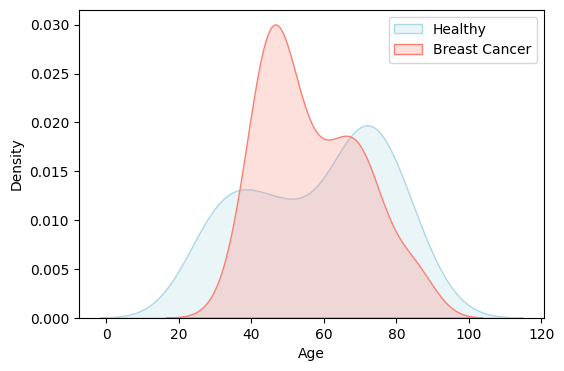

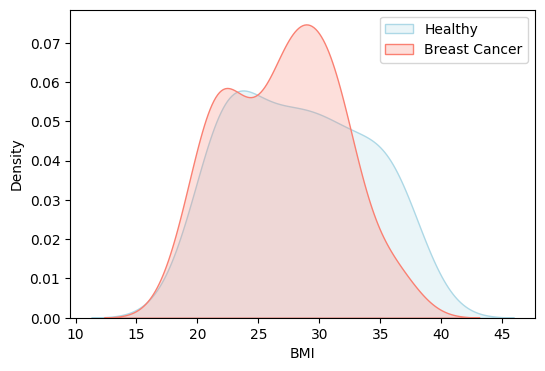

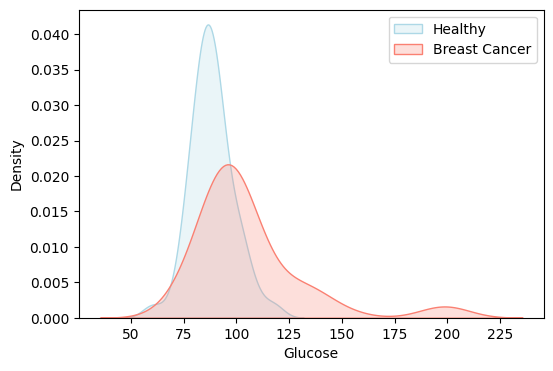

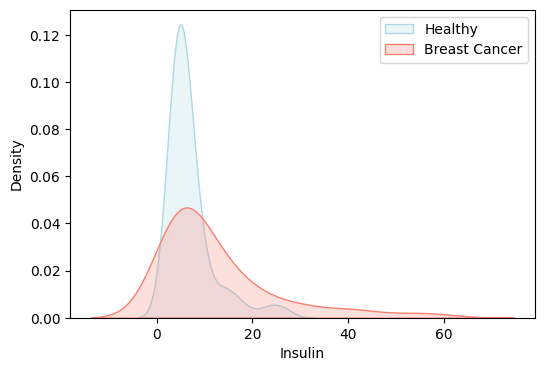

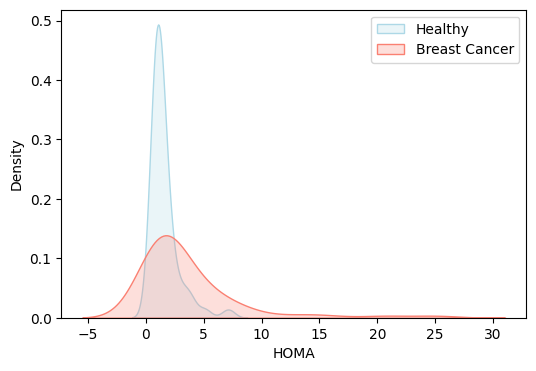

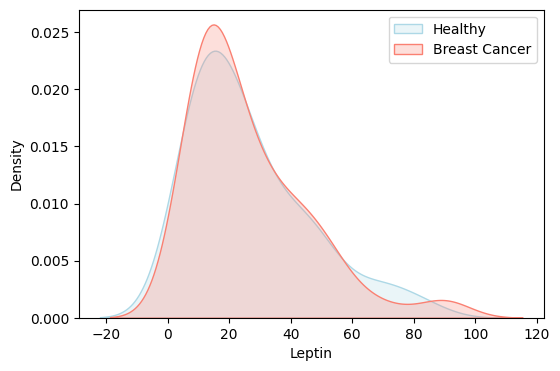

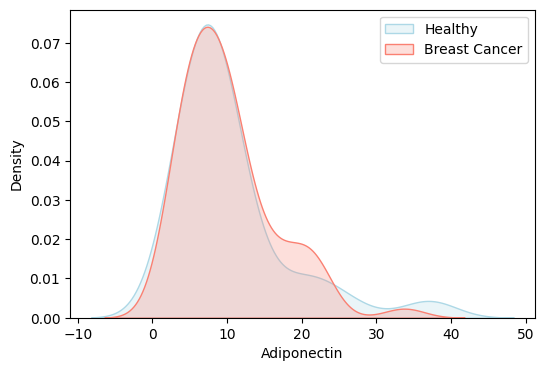

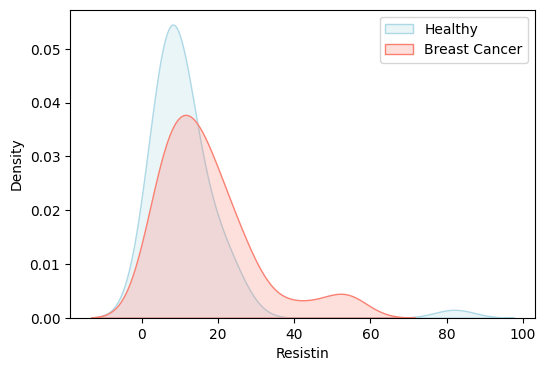

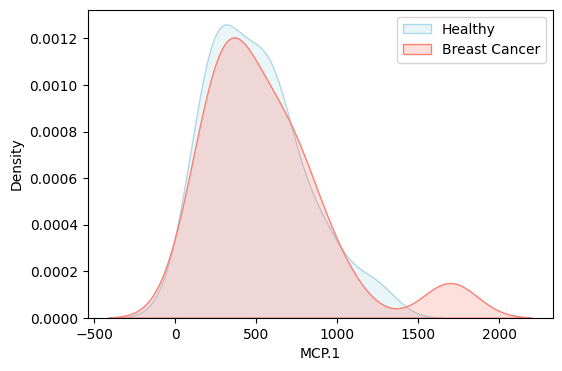

In [5]:
# KDE plots for all features

for i in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    ax = sns.kdeplot(data=negative, x=i, color='lightblue', fill=True)
    ax = sns.kdeplot(data=positive, x=i, color='salmon', fill=True)
    ax.legend(['Healthy', 'Breast Cancer'])

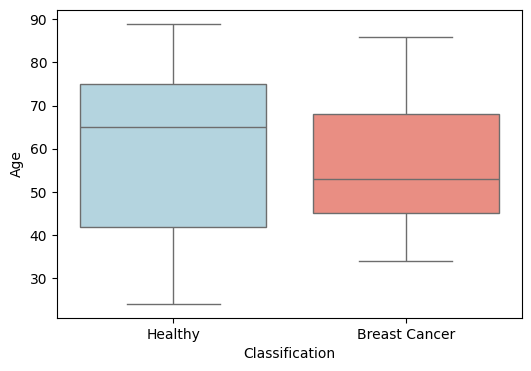

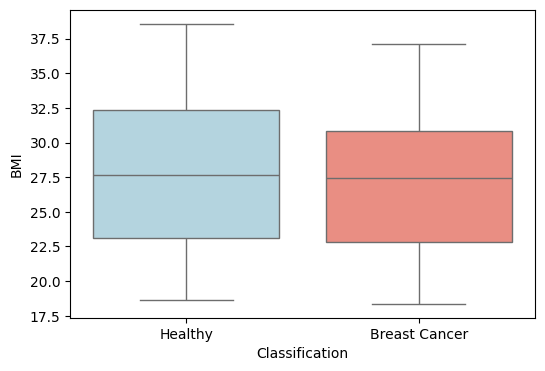

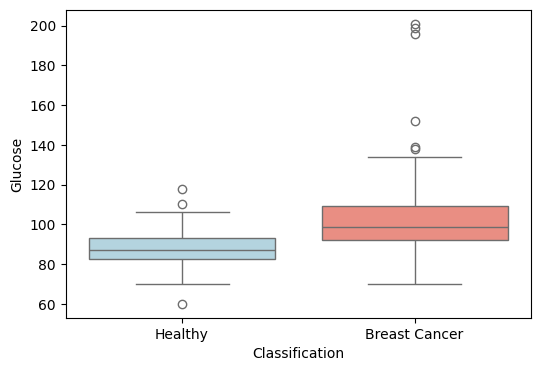

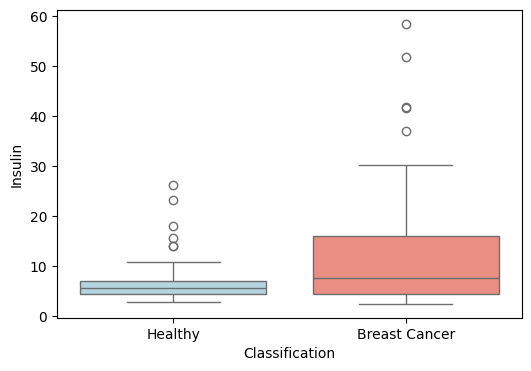

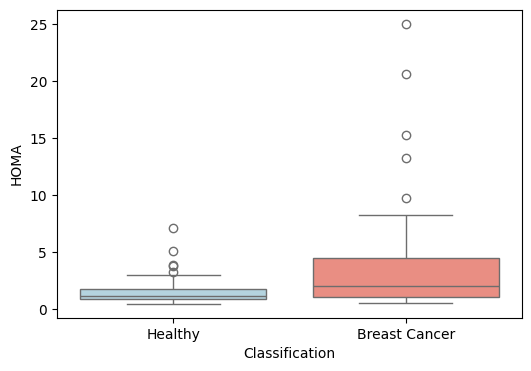

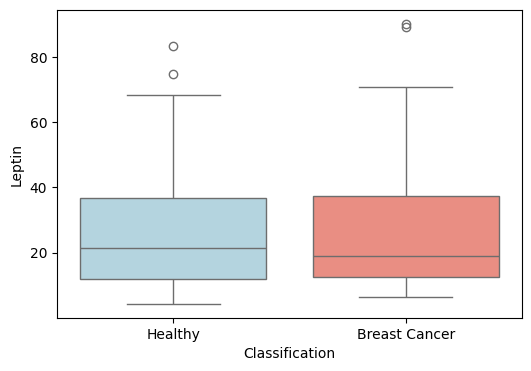

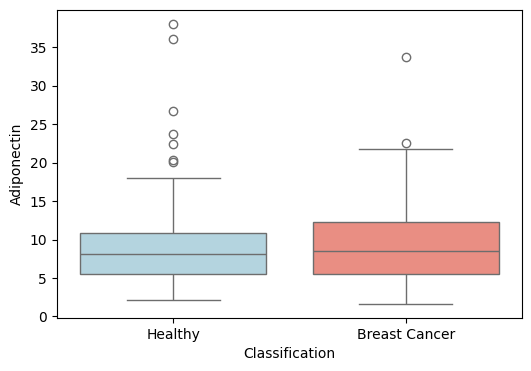

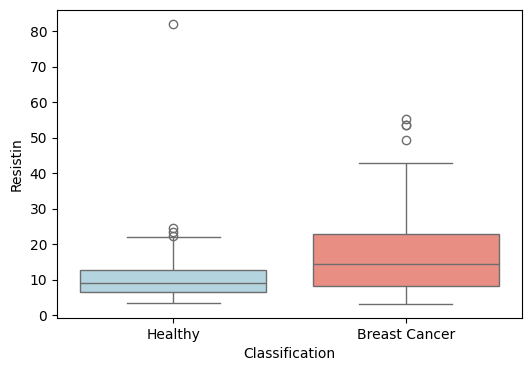

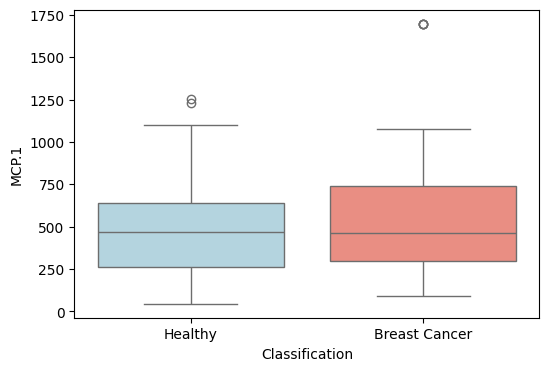

In [6]:
# boxplots for all features

for i in df.columns[:-1]:
    f = plt.figure(figsize=(6, 4))
    data = pd.concat([df['Classification'], df[i]], axis=1)
    ax = sns.boxplot(x='Classification', y=i, data=data, hue = 'Classification', palette = {1: "lightblue", 2: "salmon"}, legend=False)
    ax.grid(False)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Healthy', 'Breast Cancer'])

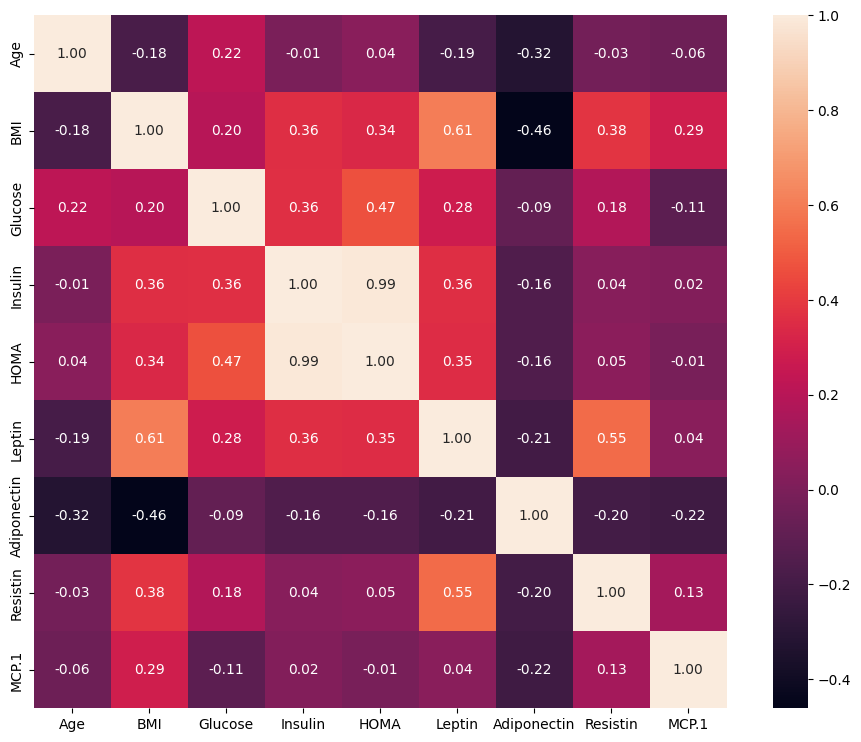

In [7]:
# correlation heatmap - healthy subjects

features = df.columns[:-1]
corr = negative.loc[:, features].corr()
f = plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, square=True, fmt='.2f', yticklabels=features, xticklabels=features);
plt.show()

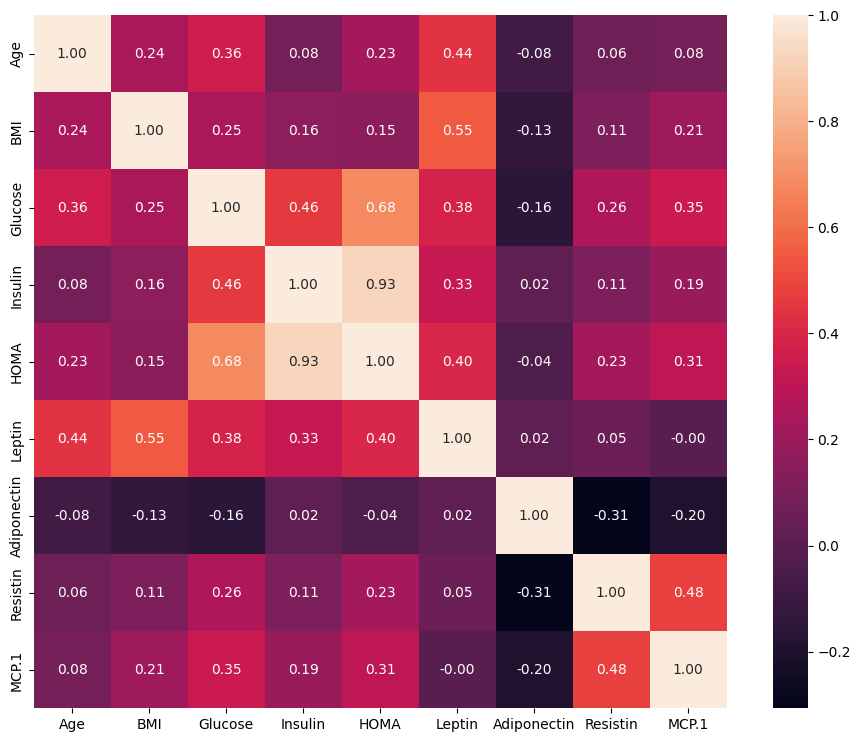

In [8]:
# correlation heatmap - patients with breast cancer

corr = positive.loc[:, features].corr()
f = plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, square=True, fmt='.2f', yticklabels=features, xticklabels=features);
plt.show()

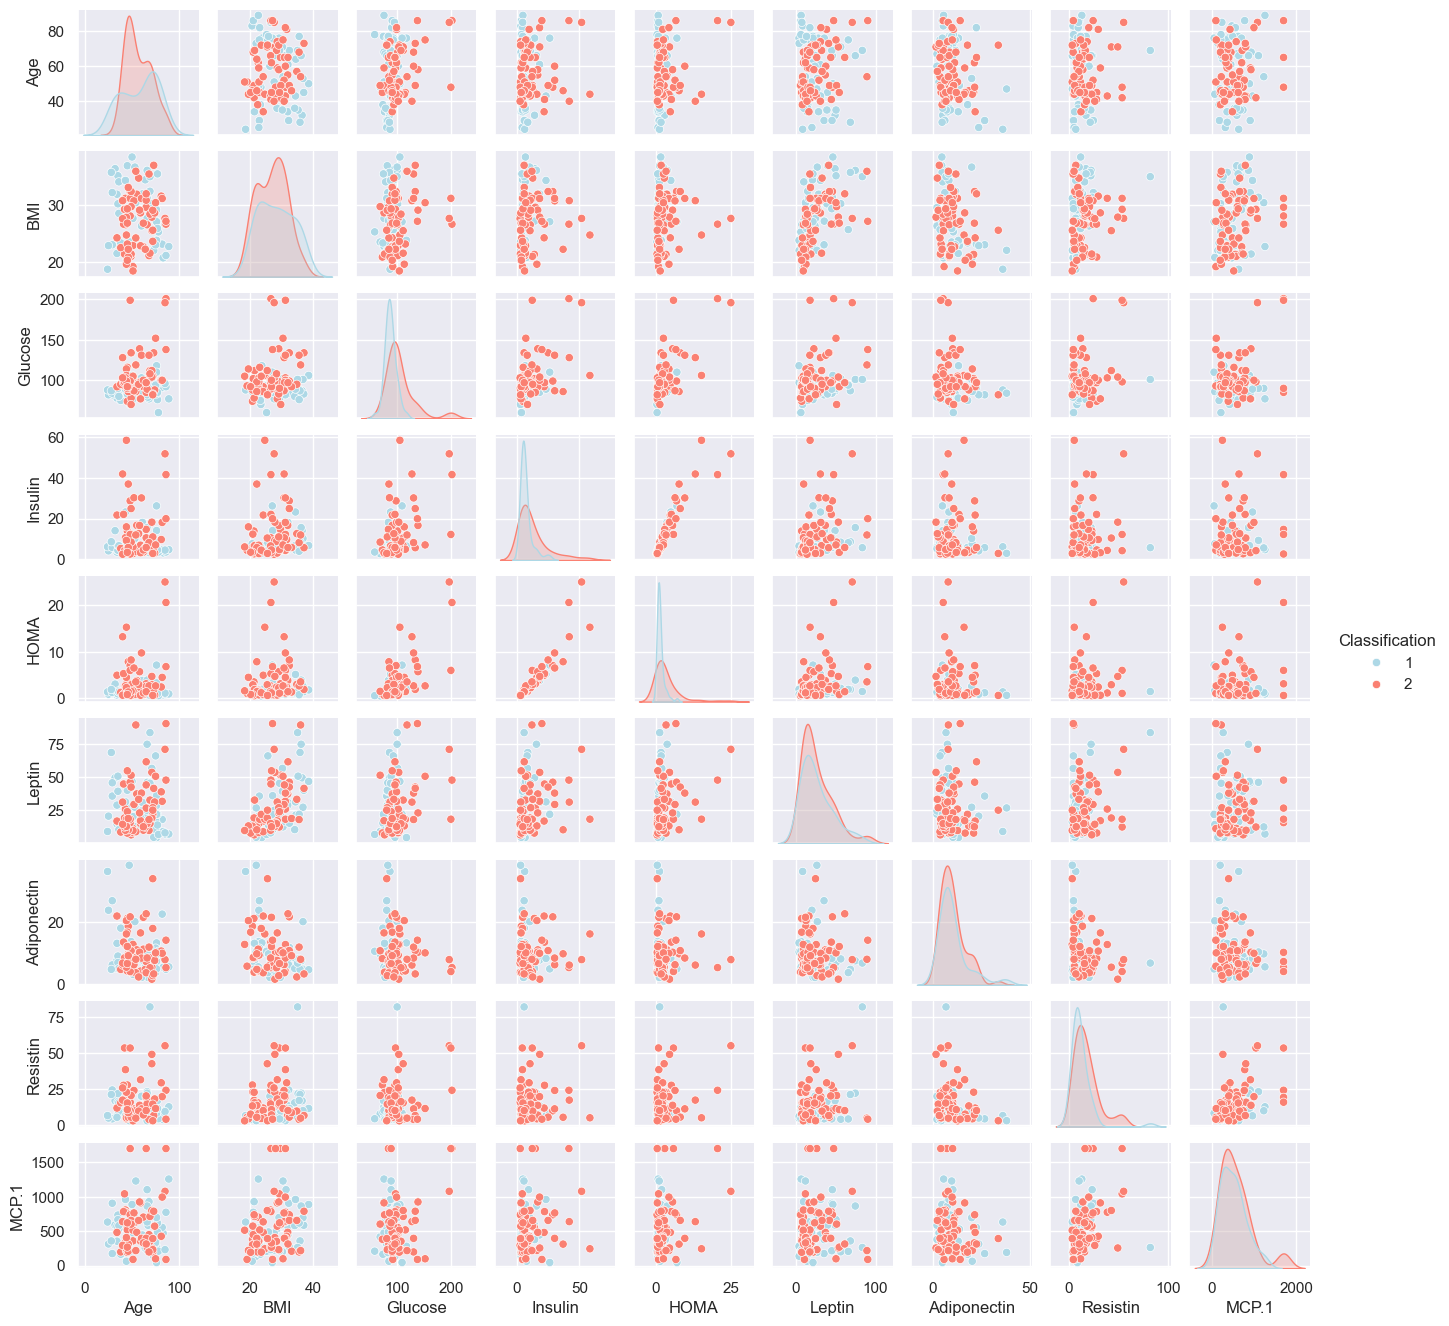

In [9]:
# pairwise feature relationships

sns.set()
sns.pairplot(df, height=1.5, hue='Classification', palette = {1: "lightblue", 2: "salmon"})
plt.show();

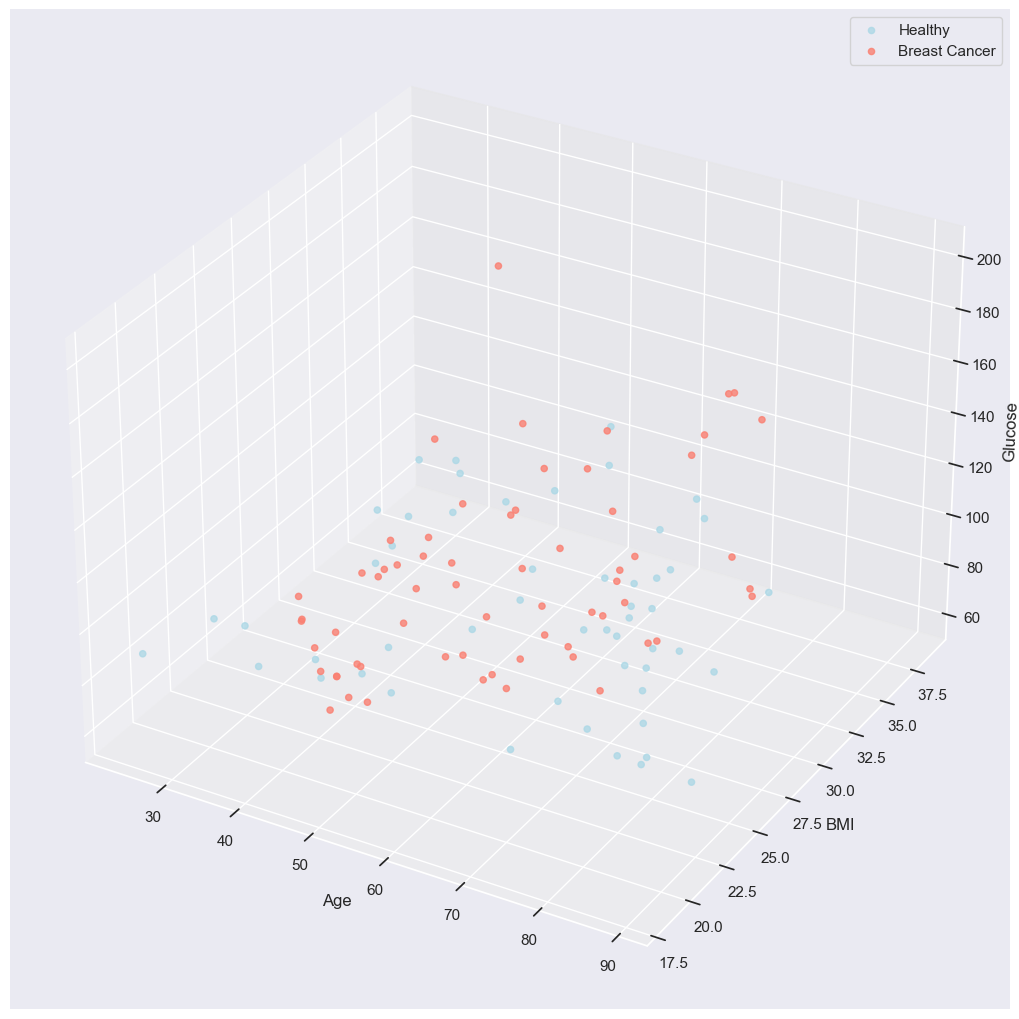

In [10]:
# 3D scatter plot - relevant features

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(negative['Age'], negative['BMI'], negative['Glucose'], c='lightblue', marker='o', alpha=0.8)
ax.scatter(positive['Age'], positive['BMI'], positive['Glucose'], c='salmon', marker='o', alpha=0.8)
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Glucose')
ax.legend(['Healthy', 'Breast Cancer'])
plt.show()

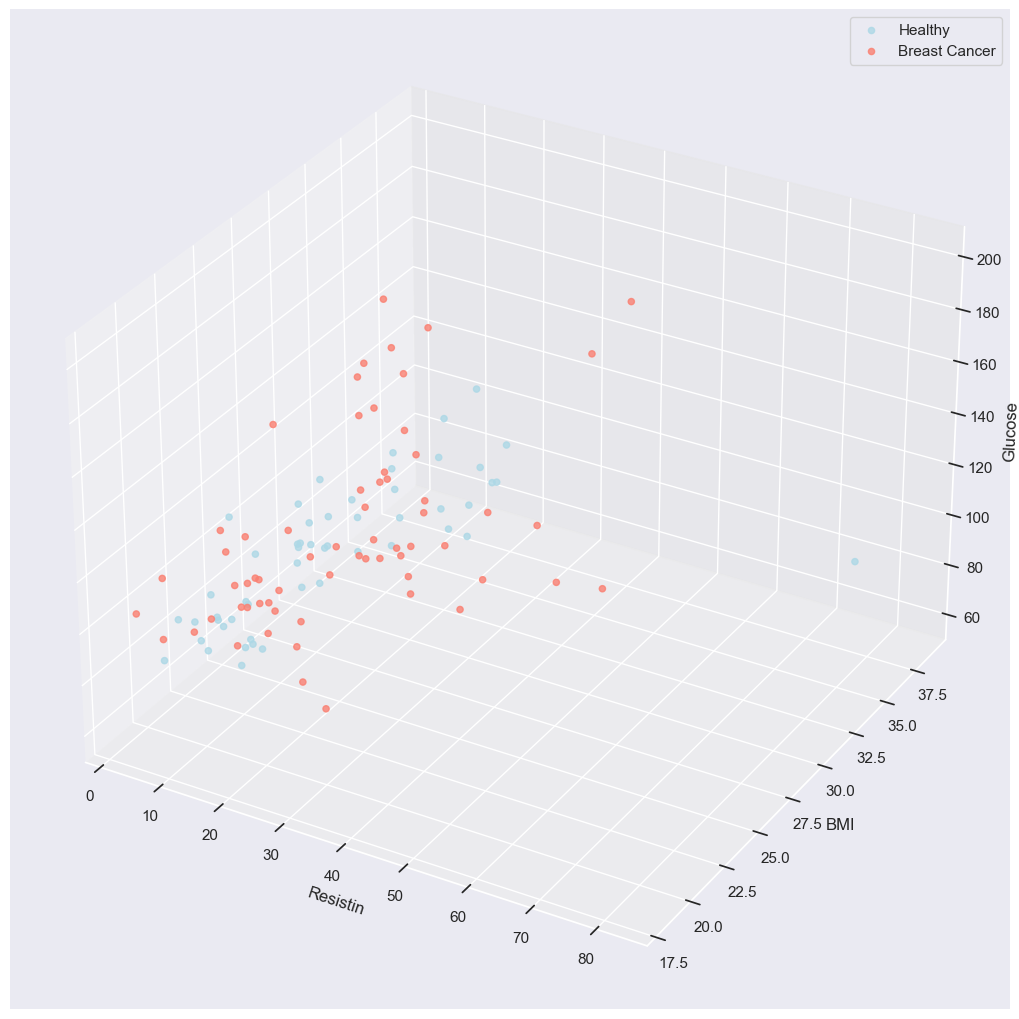

In [11]:
# 3D scatter plot - relevant features

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(negative['Resistin'], negative['BMI'], negative['Glucose'], c='lightblue', marker='o', alpha=0.8)
ax.scatter(positive['Resistin'], positive['BMI'], positive['Glucose'], c='salmon', marker='o', alpha=0.8)
ax.set_xlabel('Resistin')
ax.set_ylabel('BMI')
ax.set_zlabel('Glucose')
ax.legend(['Healthy', 'Breast Cancer'])
plt.show()

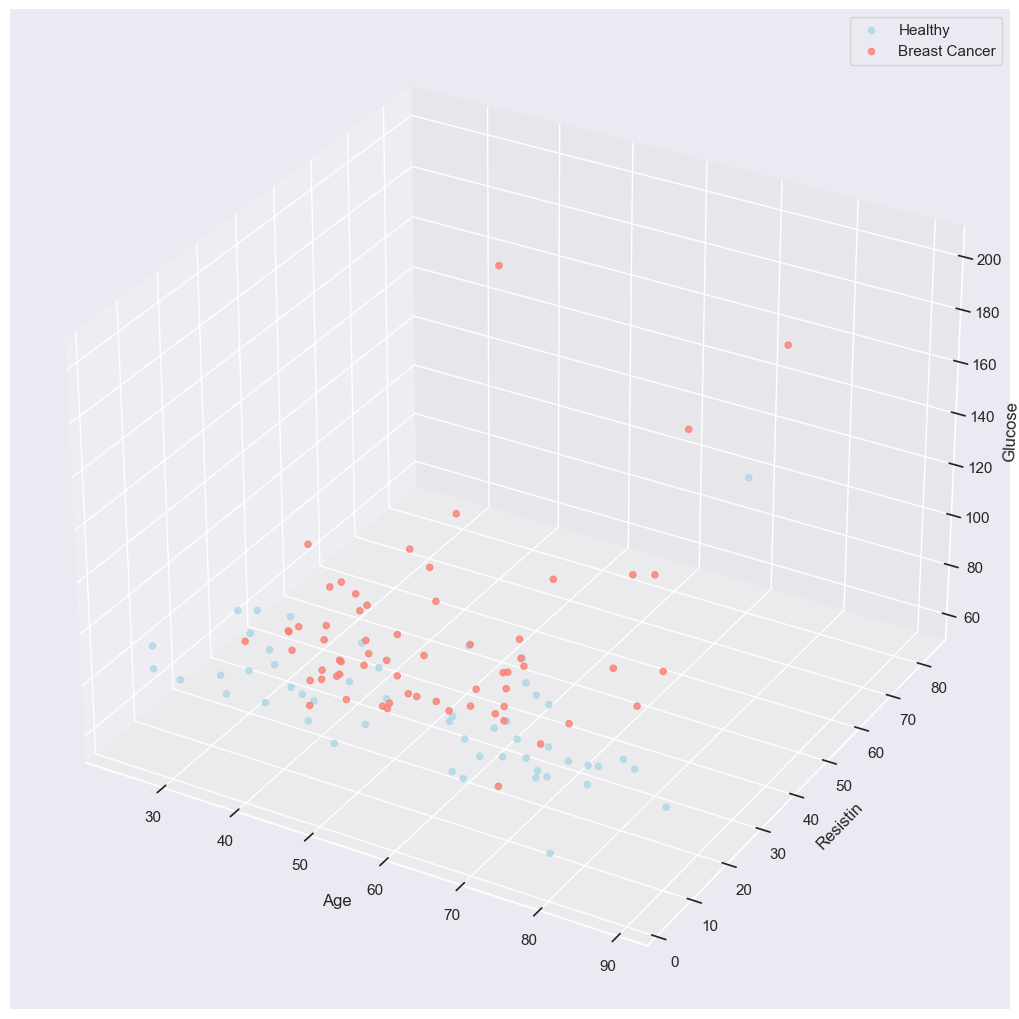

In [12]:
# 3D scatter plot - relevant features

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(negative['Age'], negative['Resistin'], negative['Glucose'], c='lightblue', marker='o', alpha=0.8)
ax.scatter(positive['Age'], positive['Resistin'], positive['Glucose'], c='salmon', marker='o', alpha=0.8)
ax.set_xlabel('Age')
ax.set_ylabel('Resistin')
ax.set_zlabel('Glucose')
ax.legend(['Healthy', 'Breast Cancer'])
plt.show()